Games:
- Tetris (325) X
- Super Mario Land (315) X
- Super Mario Land 2 (232) X
- Super Mario Land 3 (308) X
- Pokemon Red (289) X
- Pokemon Blue (247) X
- The Legend of Zelda (231) 
- Kirby's Dream Land (156) 
- Kirby's Dream Land 2 (196)
- Donkey Kong (313)
- Donkey Kong Land (244)

In [1]:
%cd VideoGameGen/data/longplay_h5_files/

/teamspace/studios/this_studio/VideoGameGen/data/longplay_h5_files


In [1]:
%cd ../gameboyprep/data/longplay_h5_files

/teamspace/studios/gameboyprep/data/longplay_h5_files


In [2]:
%ls

156_0_20fps.h5*  232_0_20fps.h5*  289_0_20fps.h5*  315_0_20fps.h5*
196_0_20fps.h5*  244_0_20fps.h5*  308_0_20fps.h5*  325_0_20fps.h5*
231_0_20fps.h5*  247_0_20fps.h5*  313_0_20fps.h5*


In [3]:
import h5py
import math
from functools import reduce
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [4]:
def display_array_as_image(array, cmap='gray'):
    plt.imshow(array, cmap=cmap)
    plt.axis('off')  # Hide axes
    plt.show()

In [5]:
selected_longplays = [325, 315, 232, 308, 289, 247, 231, 156, 196, 313, 244]

In [5]:
h5_paths = []
for file in Path('.').glob('*.h5'):
    h5_paths.append(file)

In [6]:
len(h5_paths)

11

In [9]:
# with h5py.File('315_0.h5', 'r') as f1, h5py.File('315_0_20fps.h5', 'r') as f2:
#     frame = 3555
#     display_array_as_image(f1['video_frames'][frame])
#     display_array_as_image(f2['video_frames'][frame // 3])

# with h5py.File('315_0_20fps.h5', 'r') as f:
#     frame = 0
#     display_array_as_image(f['video_frames'][frame])
total_frames = 0
for h5_path in h5_paths:
    with h5py.File(h5_path.name, 'r') as f:
        print(f"path: {h5_path.name}, frame_count: {f['video_frames'].shape[0]}")
        total_frames += f['video_frames'].shape[0]
        # display_array_as_image(f['video_frames'][frame])
print(total_frames)

path: 156_0_20fps.h5, frame_count: 61105
path: 196_0_20fps.h5, frame_count: 128311
path: 231_0_20fps.h5, frame_count: 337115
path: 232_0_20fps.h5, frame_count: 206567
path: 244_0_20fps.h5, frame_count: 84269
path: 247_0_20fps.h5, frame_count: 495173
path: 289_0_20fps.h5, frame_count: 1106685
path: 308_0_20fps.h5, frame_count: 198058
path: 313_0_20fps.h5, frame_count: 115100
path: 315_0_20fps.h5, frame_count: 34651
path: 325_0_20fps.h5, frame_count: 61897
2828931


In [10]:
def reduce_frames(input_file: str, 
                 output_file: str,
                 dataset_name: str,
                 reduction_factor: int = 3,
                 chunk_size: int = 1000) -> None:
    """
    Reduce frame rate by keeping every nth frame.
    
    Parameters:
    -----------
    input_file : str
        Path to input H5 file
    output_file : str
        Path to output H5 file
    dataset_name : str
        Name of the dataset in the H5 file
    reduction_factor : int
        Keep every nth frame (e.g., 3 for 60fps -> 20fps)
    chunk_size : int
        Number of output frames to process at once
    """
    with h5py.File(input_file, 'r') as f:
        dset = f[dataset_name]
        n_frames = dset.shape[0]
        frame_shape = dset.shape[1:]
        dtype = dset.dtype
        
        output_frames = n_frames // reduction_factor
        valid_input_frames = output_frames * reduction_factor
        
        with h5py.File(output_file, 'w') as out_f:
            out_dset = out_f.create_dataset(
                dataset_name,
                shape=(output_frames, *frame_shape),
                dtype=dtype
            )
            
            for start_idx in tqdm(range(0, output_frames, chunk_size), desc="Reducing frames"):
                end_idx = min(start_idx + chunk_size, output_frames)
                in_start = start_idx * reduction_factor
                in_end = end_idx * reduction_factor
                out_dset[start_idx:end_idx] = dset[in_start:in_end:reduction_factor]

In [ ]:
for h5_path in h5_paths:
    reduce_frames(
        input_file=h5_path.name,
        output_file=f'../../../this_studio/VideoGameGen/data/longplay_h5_files/{h5_path.stem}_20fps.h5',
        dataset_name='video_frames',
        chunk_size=9000
    )

In [99]:
%ls ../../../../

gameboyprep/  this_studio/


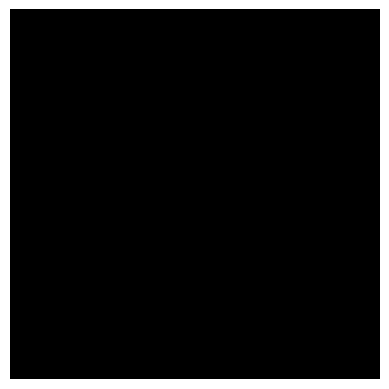

In [100]:
# with h5py.File(f'{156}_0_20fps.h5', 'r') as f:
#     display_array_as_image(f['video_frames'][18])
with h5py.File(f'../../../../gameboyprep/data/longplay_h5_files/156_0.h5', 'r') as f:
    display_array_as_image(f['video_frames'][18])